<div style="text-align: center; padding: 20px; background-color: #f0f4f8; border: 1px solid #ccc; border-radius: 10px; font-family: Arial, sans-serif;">
  <h1 style="font-size: 2.5em; margin: 0; color: #333;"> Juspay ML Assessment</h1>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4a90e2; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">

  <h2 style="text-align: center;margin-top: 0; font-size: 2.5em; color: #2c3e50;"> Task</h2>

  <p>
    Build a text classifier using a pre-trained transformer model 
    (such as <strong>BERT</strong>, <strong>RoBERTa</strong>, or <strong>DistilBERT</strong>)
    that can accurately categorize user queries into the following two classes:
  </p>

  <ul style="text-align: left; max-width: 600px; margin: auto; font-size: 1.05em;">
    <li><strong>Calendar-related queries</strong></li>
    <li> <strong>Gmail-related queries</strong></li>
  </ul>

</div>

<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style="text-align: center; font-size: 2.5em; margin-top: 0; color: #2c3e50;">Data Preparation</h2>

</div>

In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from datasets import Dataset

<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style="text-align: center; margin-top: 0; color: #2c3e50;">Creating DataSet </h2>

</div>

<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style=" margin-top: 0; color: #2c3e50;">Gmail Queries</h2>
</div>

In [2]:
data = []
gmail_queries = [
    "Find emails with PDF attachments",
    "Show me unread messages in my inbox",
    "Search for emails from Sarah about the project proposal",
    "Find emails I starred last week",
    "Search for marketing newsletters in Promotions tab",
    "Find messages with subject line 'team outing'",
    "Locate emails older than 2 years",
    "Show messages I archived last month",
    "Display all threads from finance team",
    "Find flagged emails from my boss",
    "Show email threads with attachments only",
    "List starred and important messages",
    "Search for all my deleted emails",
    "Emails with subject: 'invoice'",
    "What did John say in his last message?",
    "Search inbox for 'vacation policy'",
    "Find all emails I sent yesterday",
    "Show unread messages with attachments",
    "Find emails about 'performance review'",
    "List all emails sent by recruiter@company.com",
    "Search my inbox for budget files",
    "Emails labeled as 'personal'",
    "Show emails containing links",
    "Show all emails with the subject 'summary'",
    "List messages received last weekend",
    "Search emails with high importance",
    "Search for conversations with Alex",
    "Emails with Word documents",
    "Find emails tagged as 'follow up'",
    "Look for emails about upcoming deadlines",
    "Emails from support team",
    "Where are the emails related to onboarding?",
    "Show all correspondence with the vendor",
    "Search my sent items for marketing material",
    "Find messages with the phrase 'let's meet'",
    "Get emails that include spreadsheets",
    "Search promotions received in last 10 days",
    "Find every email Sarah has responded to",
    "Get all emails from the past month",
    "Find emails related to our last quarter review",
    "Retrieve unread emails",
    "List all unread mail",
    "Any new correspondence from HR?",
    "Search my primary inbox for unread messages",
    "Show me emails that haven't been opened yet",
    "Find all mail from Google",
    "Emails sent by me about project updates",
    "Search sent folder for 'client pitch'",
    "Show me emails I replied to today",
    "Find emails I forwarded to Mike",
    "List all messages in my spam folder",
    "Empty my trash folder", # Action implying Gmail
    "Search for emails received in January",
    "Find mail from specific sender example@domain.com",
    "Show me all emails with an Excel attachment",
    "Emails containing images",
    "Search for communications about the new policy",
    "List all drafts",
    "Show me messages with no subject",
    "Find emails from non-contacts",
    "Retrieve emails with a specific label 'Work'",
    "Show me my work-related correspondence",
    "Find any email about the meeting minutes", # Edge: could be calendar notes, but "email about" leans gmail
    "Did I get an email from the hiring manager?",
    "Check my mail for updates on my order",
    "Where is the email about the product launch?",
    "Show me the last email from the CEO",
    "Find emails I deleted yesterday",
    "List all messages in the social tab",
    "Search for old emails from past projects",
    "Show me the email thread about the budget discussion",
    "Find all communication with John Doe",
    "Messages containing the phrase 'as per our discussion'",
    "Emails that are marked as spam",
    "Show me all emails with video attachments",
    "Find communications related to tax documents",
    "List messages received during office hours",
    "Search for emails mentioning 'confidential'",
    "Retrieve important messages from last quarter",
    "Show emails that I have not yet responded to",
    "Find internal emails only",
    "Emails sent to the sales team",
    "What's in my promotions inbox?",
    "Show me the newsletters from last week",
    "Find any email that has a powerpoint file",
    "Search for emails about software licenses",
    "List all emails where I am Bcc'd",
    "Show me emails that are not categorized",
    "Find messages with more than 5 attachments",
    "Emails with attachments larger than 1MB",
    "Search for emails from a specific mailing list",
    "Show messages about the upcoming conference", # Ambiguous, but "messages about" implies email
    "Any mail from the IT department?",
    "Find the email with the flight details",
    "Show me all emails that include a signature",
    "List all messages from my subscribed lists",
    "Emails mentioning 'invoice number'",
    "Check for any unread mail from new senders",
    "Find emails from contacts only",
    "Show me the thread where we discussed the pricing",
    "Any emails containing the word 'urgent'?",
    "Retrieve messages from last calendar year", # Note: "calendar year" but about emails
    "Show me emails marked 'read'",
    "Find correspondence with the client since March",
    "List all emails that are marked as 'important'",
    "Where is the email about the new policy?",
    "Search for my personal emails",
    "Show me all emails that were moved to archives",
    "Find the email that contains the meeting link", # Edge: contains "meeting link" but is an "email"
    "List all emails with a Google Drive link",
    "Find emails from 'no-reply@company.com'",
    "Show me messages with the subject 'Daily Digest'",
    "Retrieve all emails that have been opened",
    "Search for emails that were bounced back",
    "Find the email where we shared the document",
    "List all emails that have been flagged for follow-up",
    "Show me email conversations about project deadlines",
    "Find internal team communications",
    "Emails with a high priority tag",
    "Search for messages about 'product roadmap'",
    "Show me all emails received on my birthday",
    "Find all emails containing mentions of 'budget'",
    "Messages from the CEO's office",
    "Any emails about the holiday party?",
    "Show me the long email threads",
    "Emails that are part of a conversation",
    "Find emails that I sent to myself",
    "List all emails from the support ticket system",
    "Retrieve messages related to travel bookings",
    "Show emails about 'quarterly results'",
    "Find emails with attached reports",
    "Messages containing 'client proposal'",
    "Any new emails about the sales pipeline?",
    "Find emails that are more than 6 months old",
    "Show me the messages about the team-building event", # Ambiguous, but 'messages about' leans gmail
    "Emails with a calendar invite attached", # Explicitly looking for the email
]

for q in gmail_queries:
    data.append({"text": q, "label": "gmail"})


<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style=" margin-top: 0; color: #2c3e50;">Calender Queries </h2>

</div>

In [3]:
calendar_queries = [
    "When is my next meeting with the design team?", 
    "Show me events scheduled for next Tuesday",
    "Find appointments with Dr. Johnson",
    "Show all-day events in May", 
    "What do I have planned for July 2025?", 
    "Meetings with marketing next month",
    "Display all recurring events", 
    "What meetings are on Friday?", 
    "List events where I'm the organizer",
    "Find events starting after 3 PM",
    "Remind me of all events this week", 
    "When is my next one-on-one with Mike?", 
    "Find events with location set to office", 
    "Show meetings that were canceled", 
    "Meetings scheduled at 10 AM this week", 
    "List all past events with Bob", 
    "Show events with notes about finances", 
    "All calendar invites sent to me",
    "Show everything scheduled today", 
    "Find my weekly sync-ups", 
    "Events with the word 'retrospective'", 
    "What are my obligations this afternoon?",
    "Check schedule for team reviews", 
    "Show me client meetings for next quarter",
    "Do I have anything booked this Saturday?", 
    "Any events tagged 'urgent'?", 
    "Display meetings with no responses",
    "What are my next Zoom events?",
    "List all team standups", 
    "When is the quarterly roadmap review?",
    "Upcoming offsites in my calendar",
    "Appointments with title 'demo'", 
   "Find interviews next week", 
    "Meetings from June 1 to June 10", 
    "Events marked 'tentative'",
    "Calendar entries for last month",
    "Show calendar activity this weekend", 
    "Calendar items for the second week of May", 
    "Any all-hands meetings scheduled?",
    "Recurring events with client", 
    "What's on my schedule for tomorrow?",
    "Display my upcoming appointments",
    "List all calls for today",
    "Any free slots on Wednesday afternoon?",
    "Show me events for the next three days",
    "What's my agenda for June 2nd?",
    "Find meetings where I'm a required attendee",
    "Show me team meetings next week",
    "List my personal appointments",
    "When is the standup?",
    "Are there any video calls tomorrow?",
    "Show me conference calls scheduled for this month",
    "Find my daily routine on the calendar",
    "What's the duration of the 'Project X' meeting?",
    "Show all events I declined",
    "List meetings with specific duration, e.g., 30 minutes",
    "Find the sales kickoff meeting",
    "Show me my travel schedule for July",
    "Are there any conflicts in my calendar?",
    "Check for overlapping events",
    "What's the next event at headquarters?",
    "List all events I created",
    "Show me events for public holidays",
    "Find appointments outside office hours",
    "What's my schedule for the entire day?",
    "Any new events added to my calendar?",
    "Show me accepted meeting invitations",
    "List events from a shared calendar",
    "Find a time to meet with the team", # Implies calendar action
    "Show me my availability for a meeting", # Implies calendar action
    "What is the topic of the next session?",
    "Find my booked slots for presentations",
    "List all events in my professional calendar",
    "Show me the schedule for the next quarter",
    "Any events marked as 'out of office'?",
    "Find meeting invitations that are pending response",
    "Show me where is the team sync next Tuesday", # Location-based calendar
    "What's my calendar looking like for next week?",
    "List all events that are virtual",
    "Show me the next scheduled demo",
    "Find any last-minute meetings",
    "What's the time for the daily scrum?",
    "Show me events I'm not attending",
    "List all events with a specific video conference link",
    "Find the calendar entry for the company holiday party",
    "Show me my current commitments",
    "Any events that are still unconfirmed?",
    "List all recurring events in the evening",
    "Find my upcoming interview schedule",
    "Show me the meeting details for the client review",
    "What's the agenda for the next workshop?",
    "Find all meetings with [specific email address]",
    "Show me my calendar for the upcoming week",
    "List events from 9 AM to 12 PM today",
    "Find any events with a specific agenda item",
    "Show me what's on my calendar in Chennai", # Location-based calendar
    "List all future appointments",
    "What was my schedule like on May 1st?",
    "Find the meeting about the budget discussion", # Ambiguous, but focuses on the 'meeting'
    "Show me the calendar entries for my project team",
    "Any events with attachments in the calendar?", # Specifically asking about calendar attachments
    "List events that are marked as 'busy'",
    "Find appointments that require travel",
    "Show me the schedule for the next sprint",
    "What's the location for the product launch meeting?",
    "Find recurring meetings with specific participants",
    "Show me events that I have declined",
    "List all events that are online",
    "Find any scheduled training sessions",
    "Show me my availability for a coffee chat", # Implies calendar
    "What's the plan for next month?", # Vague, but often calendar context
    "Are there any events on the shared team calendar?",
    "Find the time for the weekly standup",
    "Show me any events that are private",
    "List all upcoming deadlines on my calendar", # Implies calendar
    "What meetings do I have tomorrow morning?",
    "Find events that I need to prepare for",
    "Show me my calendar entries for the past year",
    "List all appointments with 'client' in the title",
    "Find my next available time slot",
    "Show me calendar invites where I'm optional",
    "What's on my work calendar?",
    "Find my personal calendar entries",
    "Show me events with a reminder set",
    "List all meetings without a location",
    "Find scheduled presentations",
    "Show me my commitments for the weekend",
    "What events require an RSVP?",
    "Find the meeting where we reviewed the Q1 results",
    "Show me all the calls I have this week",
]

for q in calendar_queries:
    data.append({"text": q, "label": "calendar"})

<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style="margin-top: 0; color: #2c3e50;">Ambiguous Queries  </h2>

</div>

In [4]:
ambiguous_queries = [
    {"text": "Find my conversation from yesterday", "label": random.choice(["gmail", "calendar"])}, # Randomly assign to make it balanced, or consciously assign for subtle cues.
    {"text": "Did I miss anything last week?", "label": random.choice(["gmail", "calendar"])},
    {"text": "Show everything related to Project Phoenix", "label": random.choice(["gmail", "calendar"])},
    {"text": "Check my schedule and emails from Monday", "label": random.choice(["gmail", "calendar"])},
    {"text": "Find messages or meetings with HR", "label": random.choice(["gmail", "calendar"])},
    {"text": "Did I confirm that appointment via email?", "label": "gmail"}, # Explicitly 'via email'
    {"text": "Was there any update from marketing?", "label": "gmail"}, # Updates are typically communicated via email
    {"text": "What happened with my chat with Alex?", "label": "gmail"}, # 'Chat' often implies messaging/email if not a specific chat app
    {"text": "Do I have any follow-ups with Rachel?", "label": random.choice(["gmail", "calendar"])},
    {"text": "What was discussed last Monday?", "label": random.choice(["gmail", "calendar"])},
    {"text": "Where is the invite for the team meeting?", "label": "gmail"}, # User is typically looking for the email invite
    {"text": "Can you find the notes from the client call?", "label": random.choice(["gmail", "calendar"])}, # Could be email summary or calendar notes
    {"text": "Did I send the meeting summary?", "label": "gmail"},
    {"text": "Check for new communications about the workshop.", "label": "gmail"},
    {"text": "What are the details of the upcoming review?", "label": random.choice(["gmail", "calendar"])}, # Could be in an email or a calendar event
    {"text": "Is there a record of my conversation with the manager?", "label": "gmail"},
    {"text": "Find anything related to the holiday party.", "label": random.choice(["gmail", "calendar"])}, # Could be invite, or email about planning
    {"text": "Did I get the details for the training?", "label": "gmail"},
    {"text": "What's the latest on the budget approval?", "label": "gmail"},
    {"text": "Show me the discussion about the new hire.", "label": "gmail"},
    {"text": "I need to find the confirmation for my trip.", "label": "gmail"},
    {"text": "Any updates about the project deadline?", "label": "gmail"},
    {"text": "Where can I find the link to the webinar?", "label": "gmail"}, # Link typically sent via email
    {"text": "Did I respond to the invitation?", "label": random.choice(["gmail", "calendar"])},
    {"text": "What did we talk about in the last call?", "label": random.choice(["gmail", "calendar"])},
    {"text": "Show me information about the product launch.", "label": "gmail"}, # Usually info is distributed via email
    {"text": "Find the confirmation for my appointment.", "label": "gmail"}, # Confirmation is typically email
    {"text": "Check for any new notifications.", "label": "gmail"},
    {"text": "What's the status of the proposal?", "label": "gmail"},
    {"text": "I need to find a past interaction with customer support.", "label": "gmail"},
    {"text": "Was there any discussion about the new policy?", "label": "gmail"},
    {"text": "Find the details of the presentation.", "label": random.choice(["gmail", "calendar"])},
    {"text": "Any messages about the upcoming deadline?", "label": "gmail"},
    {"text": "What happened with the negotiation?", "label": "gmail"},
    {"text": "Where are the minutes from the last meeting?", "label": random.choice(["gmail", "calendar"])}, # Can be email or attached to calendar event
    {"text": "Did I get an alert about the system maintenance?", "label": "gmail"},
    {"text": "Show me anything related to the quarterly review.", "label": random.choice(["gmail", "calendar"])},
    {"text": "Find my communication with the vendor.", "label": "gmail"},
    {"text": "What are my next steps for the project?", "label": random.choice(["gmail", "calendar"])}, # Could be task in calendar, or actions in email
    {"text": "Are there any pending approvals?", "label": "gmail"},
    {"text": "Show me discussions about the new software.", "label": "gmail"},
    {"text": "Where is the report from the last week?", "label": "gmail"},
    {"text": "Did I receive the feedback?", "label": "gmail"},
    {"text": "Find the record of our last interaction.", "label": "gmail"},
    {"text": "What was the outcome of the debate?", "label": "gmail"},
    {"text": "Show me information on the company guidelines.", "label": "gmail"},
    {"text": "Are there any updates on my request?", "label": "gmail"},
    {"text": "Find details regarding the current task.", "label": "gmail"},
    {"text": "Show me any documentation from the training.", "label": "gmail"},
    {"text": "What's the final decision on the proposal?", "label": "gmail"},
    {"text": "Did I get the agenda for the session?", "label": "gmail"},
    {"text": "Find the summary of yesterday's activities.", "label": random.choice(["gmail", "calendar"])},
    {"text": "Show me all past communications.", "label": "gmail"},
    {"text": "Any new messages from the group?", "label": "gmail"},
    {"text": "What was the consensus from the group discussion?", "label": "gmail"},
    {"text": "Find the link to the shared drive.", "label": "gmail"},
    {"text": "Show me all records from last year.", "label": "gmail"},
    {"text": "Did I sign up for that?", "label": "gmail"}, # Often confirmed by email
    {"text": "Where are the details for the event?", "label": "gmail"}, # If it's an event they're just attending, they're looking for the email details.
    {"text": "Can you find my confirmation?", "label": "gmail"},
    {"text": "Any new correspondence?", "label": "gmail"},
    {"text": "What's the status?", "label": "gmail"},
    {"text": "Show me information about the internal audit.", "label": "gmail"},
    {"text": "Find anything about the client onboarding.", "label": "gmail"},
    {"text": "Are there any follow-up items?", "label": random.choice(["gmail", "calendar"])},
    {"text": "What was agreed upon?", "label": "gmail"},
    {"text": "Show me the conversation with the recruiter.", "label": "gmail"},
    {"text": "Find details about the new hire orientation.", "label": "gmail"},
    {"text": "Any messages regarding the policy change?", "label": "gmail"},
    {"text": "Where's the registration confirmation?", "label": "gmail"},
    {"text": "Did I confirm my participation?", "label": "gmail"},
    {"text": "Show me any received confirmations.", "label": "gmail"},
    {"text": "Find updates on my application.", "label": "gmail"},
    {"text": "What's the latest from the team?", "label": "gmail"},
    {"text": "Show me the project handover notes.", "label": "gmail"},
    {"text": "Find discussions about the Q3 targets.", "label": "gmail"},
    {"text": "Any messages about the product feedback?", "label": "gmail"},
    {"text": "What are the outcomes of the survey?", "label": "gmail"},
    {"text": "Show me the documentation for the new feature.", "label": "gmail"},
    {"text": "Find the communication about the system upgrade.", "label": "gmail"},
    {"text": "Did I get the security alert?", "label": "gmail"},
    {"text": "Show me anything related to my benefits.", "label": "gmail"},
    {"text": "Find the receipt for my purchase.", "label": "gmail"},
    {"text": "Any notifications from the bank?", "label": "gmail"},
    {"text": "What's the summary of the client meeting?", "label": "gmail"}, # Often distributed via email
    {"text": "Show me information regarding the company's new policy.", "label": "gmail"},
    {"text": "Find the discussion logs.", "label": "gmail"},
    {"text": "Where are the details for the internal event?", "label": "gmail"}, # If they're just looking for details, not the event itself
    {"text": "What was the conclusion of the analysis?", "label": "gmail"},
    {"text": "Did I receive the password reset?", "label": "gmail"},
    {"text": "Find any messages about the system downtime.", "label": "gmail"},
    {"text": "Show me all messages about the upcoming team-building.", "label": "gmail"}, # "messages about" implies email
    {"text": "What's the status of my ticket?", "label": "gmail"},
    {"text": "Find communication with specific vendor for purchase order", "label": "gmail"},
    {"text": "Show me the message regarding the payment confirmation", "label": "gmail"},
    {"text": "Any unread messages from a known sender?", "label": "gmail"},
    {"text": "Find the last email related to the project", "label": "gmail"},
    {"text": "List all emails from the previous week", "label": "gmail"},
    {"text": "Show me messages with a specific priority", "label": "gmail"},
    {"text": "Find communications about the new software release", "label": "gmail"},
    {"text": "Check my inbox for promotional offers", "label": "gmail"},
    {"text": "Emails with attachments from a specific date range", "label": "gmail"},
    {"text": "Show me all messages containing 'important' in the body", "label": "gmail"},
    {"text": "Find the message chain with the sales team", "label": "gmail"},
    {"text": "Retrieve emails related to vendor invoices", "label": "gmail"},
    {"text": "Show me emails from the past two weeks", "label": "gmail"},
    {"text": "Find all emails with the subject 'follow up action'", "label": "gmail"},
    {"text": "List messages received from external contacts", "label": "gmail"},
    {"text": "Show me emails about the new employee handbook", "label": "gmail"},
    {"text": "Find all emails with attachments sent after 5 PM", "label": "gmail"},
    {"text": "Show messages related to legal documents", "label": "gmail"},
    {"text": "Find emails from the 'updates' folder", "label": "gmail"},
    {"text": "What did we cover in the last sync?", "label": "calendar"}, # 'Cover' implies discussion/meeting content
    {"text": "Can you tell me about the meeting that was cancelled?", "label": "calendar"},
    {"text": "Where is the agenda for the next board meeting?", "label": "calendar"}, # Agenda is tied to a meeting
    {"text": "Show me the details of the strategy session.", "label": "calendar"},
    {"text": "When is the next planning discussion?", "label": "calendar"},
    {"text": "Are there any calls scheduled for Friday?", "label": "calendar"},
    {"text": "What time is the daily stand-up?", "label": "calendar"},
    {"text": "Find the details of the project review meeting.", "label": "calendar"},
    {"text": "Show me what's booked on my schedule today.", "label": "calendar"},
    {"text": "List all events that required my attendance.", "label": "calendar"},
    {"text": "When is the next client call?", "label": "calendar"},
    {"text": "What's on my calendar for the upcoming days?", "label": "calendar"},
    {"text": "Find out if I have anything planned for the weekend.", "label": "calendar"},
    {"text": "Show me all my recurring appointments.", "label": "calendar"},
    {"text": "Are there any meetings with Jim this week?", "label": "calendar"},
    {"text": "What time is the team building event?", "label": "calendar"},
    {"text": "Find the conference call details for tomorrow.", "label": "calendar"},
    {"text": "Show me the agenda for the product demo.", "label": "calendar"},
    {"text": "List all accepted invitations.", "label": "calendar"},
    {"text": "When is the next check-in?", "label": "calendar"},
    {"text": "What was the topic of the last meeting I attended?", "label": "calendar"},
    {"text": "Find any scheduled one-on-ones.", "label": "calendar"},
    {"text": "Show me my schedule for next Tuesday morning.", "label": "calendar"},
    {"text": "Are there any calls with external stakeholders?", "label": "calendar"},
    {"text": "List all my meetings for the current month.", "label": "calendar"},
    {"text": "What is the start time of the next session?", "label": "calendar"},
    {"text": "Find the location of the upcoming workshop.", "label": "calendar"},
    {"text": "Show me my bookings for next quarter.", "label": "calendar"},
    {"text": "Any events with 'onboarding' in the title?", "label": "calendar"},
    {"text": "What time is the daily sync?", "label": "calendar"},
    {"text": "Find out what meetings are marked as optional.", "label": "calendar"},
    {"text": "Show me my entire calendar for this year.", "label": "calendar"},
    {"text": "List all events I organized recently.", "label": "calendar"},
    {"text": "When is the review session for the new feature?", "label": "calendar"},
    {"text": "Find details for the company-wide town hall.", "label": "calendar"},
    {"text": "Show me all entries that are private.", "label": "calendar"},
    {"text": "What's my availability for a quick chat?", "label": "calendar"},
    {"text": "Are there any calls before 9 AM tomorrow?", "label": "calendar"},
    {"text": "List all meetings with more than 5 participants.", "label": "calendar"},
    {"text": "Find the upcoming holiday events.", "label": "calendar"},
    {"text": "Show me my travel schedule for the next few weeks.", "label": "calendar"},
    {"text": "What's the purpose of the meeting on Thursday?", "label": "calendar"},
    {"text": "Find any events that have conflicts.", "label": "calendar"},
    {"text": "Show me the status of my meeting invitations.", "label": "calendar"},
    {"text": "List all events that are marked as tentative.", "label": "calendar"},
    {"text": "When is the next project milestone discussion?", "label": "calendar"},
    {"text": "Find the notes from the last project meeting.", "label": "calendar"}, # Notes are tied to the meeting
    {"text": "Show me my calendar for the first week of next month.", "label": "calendar"},
    {"text": "Any team activities planned for the year?", "label": "calendar"},
    {"text": "What's the start and end time of the sprint planning?", "label": "calendar"},
    {"text": "Find all meetings that I declined.", "label": "calendar"},
    {"text": "Show me events with a specific video conferencing tool.", "label": "calendar"},
    {"text": "List all events that are in my personal calendar.", "label": "calendar"},
    {"text": "What's on my work calendar for today?", "label": "calendar"},
    {"text": "Find the next available slot for a 30-minute call.", "label": "calendar"},
    {"text": "Show me my blocked-out times.", "label": "calendar"},
    {"text": "Are there any events on the shared HR calendar?", "label": "calendar"},
    {"text": "Find the details of the team offsite.", "label": "calendar"},
    {"text": "Show me the schedule for new employee onboarding.", "label": "calendar"},
    {"text": "List all meetings that require my approval.", "label": "calendar"},
    {"text": "When is the next performance review session?", "label": "calendar"},
    {"text": "Find the event where we discussed the Q2 budget.", "label": "calendar"},
    {"text": "Show me my calendar entries for the last six months.", "label": "calendar"},
    {"text": "What's the purpose of the upcoming call?", "label": "calendar"},
    {"text": "Find all events with a specific room booking.", "label": "calendar"},
    {"text": "Show me my schedule for this entire week.", "label": "calendar"},
    {"text": "List all events from the finance department.", "label": "calendar"},
    {"text": "When is the next executive meeting?", "label": "calendar"},
    {"text": "Find events where I'm listed as a speaker.", "label": "calendar"},
    {"text": "Show me the schedule for the next product roadmap planning.", "label": "calendar"},
    {"text": "What's my agenda for the next few hours?", "label": "calendar"},
    {"text": "Find any past events with John.", "label": "calendar"},
    {"text": "Show me all calendar entries for this weekend.", "label": "calendar"},
    {"text": "List all meetings that are currently ongoing.", "label": "calendar"},
    {"text": "When is the next all-hands meeting?", "label": "calendar"},
    {"text": "Find the details for the upcoming conference.", "label": "calendar"},
    {"text": "Show me all events that are marked as private.", "label": "calendar"},
    {"text": "What's my availability for an internal sync?", "label": "calendar"},
    {"text": "Are there any meetings about the upcoming project?", "label": "calendar"},
    {"text": "List all events that span multiple days.", "label": "calendar"},
    {"text": "Find the location for the client meeting on Thursday.", "label": "calendar"},
    {"text": "Show me any canceled appointments.", "label": "calendar"},
    {"text": "What's the next event on my shared calendar?", "label": "calendar"},
    {"text": "Find my schedule for the entire month.", "label": "calendar"},
    {"text": "Show me upcoming training sessions.", "label": "calendar"},
    {"text": "List all events that I have joined.", "label": "calendar"},
    {"text": "When is the next brainstorming session?", "label": "calendar"},
    {"text": "Find events with specific attendees invited.", "label": "calendar"},
    {"text": "Show me any events that have been modified.", "label": "calendar"},
    {"text": "What's my availability for a quick call today?", "label": "calendar"},
    {"text": "Find events marked as 'confirmed'.", "label": "calendar"},
    {"text": "Show me my schedule for tomorrow afternoon.", "label": "calendar"},
    {"text": "List all events from a specific project.", "label": "calendar"},
    {"text": "When is the next team review?", "label": "calendar"},
    {"text": "Find all meetings that were rescheduled.", "label": "calendar"},
    {"text": "Show me my full calendar view.", "label": "calendar"},
    {"text": "What's the next official holiday?", "label": "calendar"},
    {"text": "Find events where I am the primary contact.", "label": "calendar"},
    {"text": "Show me the next scheduled maintenance event.", "label": "calendar"},
    {"text": "List all events with a specific agenda item.", "label": "calendar"},
    {"text": "Find my calendar for the first week of October.", "label": "calendar"},
    {"text": "Show me upcoming professional development events.", "label": "calendar"},
    {"text": "What events are on my family calendar?", "label": "calendar"},
    {"text": "Find all events that repeat weekly.", "label": "calendar"},
    {"text": "Show me any upcoming travel bookings in my calendar.", "label": "calendar"},
]

# Using random.choice to balance the ambiguous queries and add variety
for q in ambiguous_queries:
    data.append({"text": q["text"], "label": q["label"]})

<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style="margin-top: 0; color: #2c3e50;">Creating Pandas dataframe </h2>

</div>

In [5]:
final_dataset = data
df = pd.DataFrame(final_dataset)
df = df.sample(frac=1).reset_index(drop=True)

<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style="margin-top: 0; color: #2c3e50;">Saving the dataset in CSV file</h2>

</div>

In [6]:
# Save the CSV
df.to_csv("gmail_calendar_queries.csv", index=False)
df.head()

,text,label
0,What's my availability for an internal sync?,calendar
1,Emails with a calendar invite attached,gmail
2,Was there any update from marketing?,gmail
3,List events from a shared calendar,calendar
4,Find the record of our last interaction.,gmail


<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style="margin-top: 0; color: #2c3e50;">Reading From CSV File...</h2>
  <h4 style="margin-top: 0; color: #2c3e50;"></h4>Ignore this if you want to run directly..</h4>

</div>

In [7]:
df = pd.read_csv("/kaggle/working/gmail_calendar_queries.csv")
df.head()

,text,label
0,What's my availability for an internal sync?,calendar
1,Emails with a calendar invite attached,gmail
2,Was there any update from marketing?,gmail
3,List events from a shared calendar,calendar
4,Find the record of our last interaction.,gmail


<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h3 style="margin-top: 0; color: #2c3e50;"></h4>Performing Label Encoding..</h4>

</div>

In [8]:
label_map = {'gmail': 0, 'calendar': 1}
df['label'] = df['label'].map(label_map)

<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">
  <h2 style="margin-top: 0; color: #2c3e50;">Class Distribution Of Dataset..</h2>
</div>

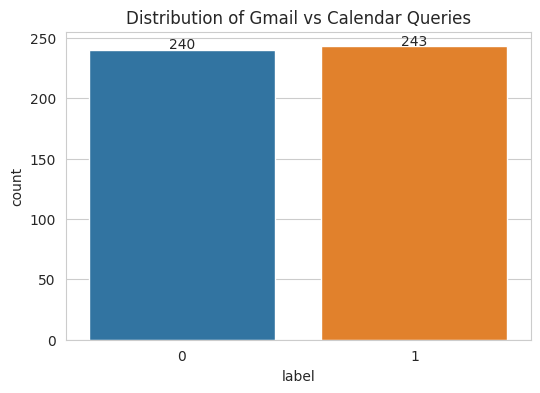

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x='label')
plt.title("Distribution of Gmail vs Calendar Queries")

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, 
            y=height + 1,  # adjust the vertical position
            s=int(height), 
            ha='center')

plt.show()

<div style="background-color: #fefefe; border-left: 5px solid #2980b9; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">

  <h2 style="margin-top: 0; color: #2c3e50;">TextDatasetProcessor </h2>
  <p>preprocess text data for fine-tuning transformer models using Hugging Face libraries.</p>
    <h3 style="color: #2c3e50;"> __init__()</h3>
  <p>Initializes tokenizer, class labels, and stores input DataFrame.</p>
  <ul>
    <li><code>df</code>: Input pandas DataFrame</li>
    <li><code>text_column</code>: Column with raw text</li>
    <li><code>label_column</code>: Column with target labels</li>
    <li><code>pretrained_model_name</code>: e.g., 'distilbert-base-uncased'</li>
    <li><code>num_classes</code>: Number of output classes (default=2)</li>
  </ul>

  <h3 style="color: #2c3e50;"> convert_to_dataset()</h3>
  <p>Converts the input DataFrame to a Hugging Face <code>Dataset</code> and maps label column to a <code>ClassLabel</code> type.</p>

  <h3 style="color: #2c3e50;"> tokenize()</h3>
  <p>Tokenizes the text column using the selected tokenizer. Adds <code>input_ids</code> and <code>attention_mask</code>, and prepares for PyTorch.</p>

  <h3 style="color: #2c3e50;">get_splits()</h3>
  <p>Performs stratified splitting into train, validation, and test sets.</p>
  <ul>
    <li>Ensures class balance</li>
    <li>Reproducible with <code>seed</code> parameter</li>
  </ul>

  <h3 style="color: #2c3e50;">get_data_loaders()</h3>
  <p>Returns PyTorch DataLoaders for training, validation, and testing. Internally calls all other processing steps.</p>

  <h3 style="color: #2c3e50;">Why It Matters</h3>
  <p>This class simplifies the preprocessing pipeline for transformer-based NLP tasks. Useful for research, prototyping, and production-level fine-tuning.</p>
</div>

In [10]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from datasets import Dataset, ClassLabel

class TextDatasetProcessor:
    def __init__(self, df, text_column, label_column, pretrained_model_name, num_classes=2):
        self.df = df
        self.text_column = text_column
        self.label_column = label_column
        self.tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
        self.label_class = ClassLabel(num_classes=num_classes, names=["gmail", "calendar"])
        self.dataset = None
        self.tokenized_dataset = None

    def convert_to_dataset(self):
        self.dataset = Dataset.from_pandas(self.df)
        self.dataset = self.dataset.cast_column(self.label_column, self.label_class)

    def tokenize(self):
        def tokenize_fn(example):
            return self.tokenizer(example[self.text_column], padding="max_length", truncation=True)

        self.tokenized_dataset = self.dataset.map(tokenize_fn, batched=True)
        self.tokenized_dataset = self.tokenized_dataset.rename_column(self.label_column, "labels")
        self.tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    def get_splits(self, test_size=0.3, val_size=0.5, seed=42):
        # Split into train/test
        full_split = self.tokenized_dataset.train_test_split(test_size=test_size, stratify_by_column="labels", seed=seed)
        val_test_split = full_split["test"].train_test_split(test_size=val_size, stratify_by_column="labels", seed=seed)

        train_dataset = full_split["train"]
        val_dataset = val_test_split["train"]
        test_dataset = val_test_split["test"]

        return train_dataset, val_dataset, test_dataset

    def get_data_loaders(self, batch_size=16, seed=42):
        self.convert_to_dataset()
        self.tokenize()
        train_ds, val_ds, test_ds = self.get_splits(seed=seed)

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_ds, batch_size=batch_size)
        test_loader = DataLoader(test_ds, batch_size=batch_size)

        return train_loader, val_loader, test_loader

In [11]:
processor = TextDatasetProcessor(
        df=df,
        text_column="text",
        label_column="label",
        pretrained_model_name="distilbert-base-uncased",
        num_classes=2
    )

train_loader, val_loader, test_loader = processor.get_data_loaders(batch_size=16)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Casting the dataset:   0%|          | 0/483 [00:00<?, ? examples/s]

Map:   0%|          | 0/483 [00:00<?, ? examples/s]

--------------------------------------------------------

In [12]:
!pip install dateparser

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 10.1 MB/s eta 0:00:00


<div style="background-color: #fefefe; border-left: 5px solid #27ae60; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">

  <h2 style="margin-top: 0; color: #2c3e50;">TextClassifier using pre-trained Model-DistilBERT</h2>
  <p>A complete training and inference pipeline built on top of a pre-trained DistilBERT model for classifying queries into Gmail or Calendar intents. Includes tokenization, training with early stopping, evaluation, and intelligent time range extraction for calendar-related queries.</p>

  <h3 style="color: #2c3e50;"> __init__()</h3>
  <ul>
    <li><code>pretrained_model_name</code>: Name of HuggingFace model (e.g. <code>"distilbert-base-uncased"</code>)</li>
    <li><code>num_classes</code>: Number of output classes (2 in this case)</li>
    <li><code>train_loader</code>, <code>val_loader</code>, <code>test_loader</code>: PyTorch DataLoaders</li>
    <li><code>lr</code>: Learning rate</li>
    <li><code>dropout_prob</code>: Dropout for regularization</li>
    <li><code>num_epochs</code>: Total training epochs</li>
    <li><code>patience</code>: Early stopping patience</li>
    <li><code>device</code>: CPU or GPU</li>
    <li><code>save_path</code>: Path to save the best model</li>
  </ul>

  <h3 style="color: #2c3e50;"> train_model()</h3>
  <p>Trains the model using AdamW, learning rate scheduler, and early stopping. Saves the best model based on validation accuracy. Logs:</p>
  <ul>
    <li>Training loss and accuracy</li>
    <li>Validation accuracy</li>
    <li>Patience-based early stopping</li>
  </ul>

  <h3 style="color: #2c3e50;"> validate_model()</h3>
  <p>Evaluates model on validation set and returns accuracy.</p>

  <h3 style="color: #2c3e50;"> evaluate_model()</h3>
  <p>Evaluates the model on the test set and prints:</p>
  <ul>
    <li>Test accuracy</li>
    <li>Classification report</li>
    <li>Confusion matrix (optional heatmap)</li>
  </ul>

  <h3 style="color: #2c3e50;"> predict_query_intelligent(text)</h3>
  <p>Intelligently classifies the query and returns:</p>
  <ul>
    <li><strong>Label</strong>: "gmail" or "calendar"</li>
    <li><strong>Confidence</strong>: Prediction confidence</li>
    <li><strong>Time range</strong>: Only for calendar-related queries (auto-extracted)</li>
  </ul>

  <h3 style="color: #2c3e50;"> extract_calendar_time_range(query)</h3>
  <p>Extracts time intervals like "this week", "next weekend", or "from X to Y" using <code>dateparser</code>. Returns:</p>
  <pre>{
  "from": "YYYY-MM-DD",
  "to": "YYYY-MM-DD"
}</pre>

  <h3 style="color: #2c3e50;"> save_model()</h3>
  <p>Saves the best model weights as <code>.pth</code> file.</p>

  <h3 style="color: #2c3e50;"> _plot_training_history()</h3>
  <p>Visualizes training loss and accuracy with <code>matplotlib</code>.</p>

</div>

In [13]:
import os
import re
import torch
import torch.nn as nn
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import dateparser
from transformers import AutoModel, get_scheduler
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class TextClassifier(nn.Module):
    def __init__(self, pretrained_model_name, num_classes, train_loader, val_loader, test_loader,
                 lr=5e-5, dropout_prob=0.1, num_epochs=10, patience=3,
                 device=None, save_path="./best_model.pth"):
        super(TextClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(pretrained_model_name)
        self.dropout = nn.Dropout(dropout_prob)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)
        self.tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
        self.label_map = label_map or {0: "gmail", 1: "calendar"}
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.num_epochs = num_epochs
        self.patience = patience
        self.save_path = save_path
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)

        self.optimizer = AdamW(self.parameters(), lr=lr)
        self.criterion = CrossEntropyLoss()
        self.scheduler = get_scheduler(
            "linear",
            optimizer=self.optimizer,
            num_warmup_steps=0,
            num_training_steps=self.num_epochs * len(train_loader)
        )

    def forward(self, input_ids, attention_mask=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=True)
        pooled_output = outputs.last_hidden_state[:, 0]  # CLS token
        dropped_out = self.dropout(pooled_output)
        logits = self.classifier(dropped_out)
        return logits

    def train_model(self):
        best_val_acc = 0
        patience_counter = 0
        self.history = {"train_loss": [], "train_acc": [], "val_acc": []}

        for epoch in range(self.num_epochs):
            self.train()
            loop = tqdm(self.train_loader, leave=True)
            running_loss, correct, total = 0, 0, 0

            for batch in loop:
                self.optimizer.zero_grad()
                input_ids = batch["input_ids"].to(self.device)
                attention_mask = batch["attention_mask"].to(self.device)
                labels = batch["labels"].to(self.device)

                logits = self(input_ids=input_ids, attention_mask=attention_mask)
                loss = self.criterion(logits, labels)
                loss.backward()
                self.optimizer.step()
                self.scheduler.step()

                running_loss += loss.item() * labels.size(0)
                preds = torch.argmax(logits, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                loop.set_description(f"Epoch {epoch + 1}")
                loop.set_postfix(loss=running_loss / total, accuracy=correct / total)

            train_loss = running_loss / total
            train_acc = correct / total
            val_acc = self.validate_model()

            print(f" Epoch {epoch + 1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

            self.history["train_loss"].append(train_loss)
            self.history["train_acc"].append(train_acc)
            self.history["val_acc"].append(val_acc)

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
                self.save_model(self.save_path)
                print(f" New best model saved (Val Acc: {val_acc:.4f})")
            else:
                patience_counter += 1
                print(f" No improvement. Patience: {patience_counter}/{self.patience}")

            if patience_counter >= self.patience:
                print(" Early stopping triggered.")
                break

        self._plot_training_history()

    def validate_model(self):
        self.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for batch in self.val_loader:
                input_ids = batch["input_ids"].to(self.device)
                attention_mask = batch["attention_mask"].to(self.device)
                labels = batch["labels"].to(self.device)

                logits = self(input_ids=input_ids, attention_mask=attention_mask)
                preds = torch.argmax(logits, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        return correct / total

    def evaluate_model(self, id_to_label=None, visualize=True):
        self.eval()
        correct, total = 0, 0
        all_preds, all_labels = [], []

        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="Testing"):
                input_ids = batch["input_ids"].to(self.device)
                attention_mask = batch["attention_mask"].to(self.device)
                labels = batch["labels"].to(self.device)

                logits = self(input_ids=input_ids, attention_mask=attention_mask)
                preds = torch.argmax(logits, dim=1)

                correct += (preds == labels).sum().item()
                total += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = correct / total
        print(f"\n Test Accuracy: {acc:.4f}")

        if id_to_label:
            target_names = [id_to_label[i] for i in sorted(id_to_label.keys())]
            print("\n--- Classification Report ---")
            print(classification_report(all_labels, all_preds, target_names=target_names))

            cm = confusion_matrix(all_labels, all_preds)
            print("\n--- Confusion Matrix ---")
            print(cm)

            if visualize:
                plt.figure(figsize=(6, 4))
                sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                            xticklabels=target_names, yticklabels=target_names)
                plt.xlabel("Predicted")
                plt.ylabel("True")
                plt.title("Confusion Matrix")
                plt.tight_layout()
                plt.show()

        return acc

    def save_model(self, save_path):
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        torch.save(self.state_dict(), save_path)
        print(f"Model saved to: {save_path}")

    def _plot_training_history(self):
        epochs = range(1, len(self.history["train_loss"]) + 1)
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.history["train_loss"], label="Train Loss", marker='o')
        plt.title("Training Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.history["train_acc"], label="Train Accuracy", marker='o')
        plt.plot(epochs, self.history["val_acc"], label="Validation Accuracy", marker='o')
        plt.title("Training & Validation Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

    def predict_query_intelligent(self, text):
        self.eval()
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        input_ids = inputs["input_ids"].to(self.device)
        attention_mask = inputs["attention_mask"].to(self.device)

        with torch.no_grad():
            logits = self(input_ids=input_ids, attention_mask=attention_mask)
        probabilities = torch.softmax(logits, dim=1)
        predicted_class_id = torch.argmax(probabilities, dim=1).item()
        predicted_label = id_to_label[predicted_class_id]
        confidence = probabilities[0, predicted_class_id].item()

        time_range = None
        if predicted_label == "calendar":
            time_range = self.extract_calendar_time_range(text)

        return predicted_label, confidence, time_range

    @staticmethod
    def extract_calendar_time_range(query: str):
        query_lower = query.lower()
        settings = {
            'RELATIVE_BASE': datetime.now(),
            'PREFER_DATES_FROM': 'current_period',
            'FUZZY': True,
            'STRICT_PARSING': False,
            'RETURN_AS_TIMEZONE_AWARE': False
        }
        langs = ['en']
        from_date = None
        to_date = None

        parsed = dateparser.parse(query, settings=settings, languages=langs)
        if parsed:
            from_date = parsed.replace(hour=0, minute=0, second=0, microsecond=0)
            to_date = parsed.replace(hour=23, minute=59, second=59, microsecond=999999)

        if not from_date:
            if "next week" in query_lower:
                parsed = dateparser.parse("next week", settings=settings, languages=langs)
                from_date = parsed - timedelta(days=parsed.weekday())
                to_date = from_date + timedelta(days=6)
            elif "this week" in query_lower:
                parsed = dateparser.parse("this week", settings=settings, languages=langs)
                from_date = parsed - timedelta(days=parsed.weekday())
                to_date = from_date + timedelta(days=6)
            elif "last week" in query_lower:
                parsed = dateparser.parse("last week", settings=settings, languages=langs)
                from_date = parsed - timedelta(days=parsed.weekday()) - timedelta(days=7)
                to_date = from_date + timedelta(days=6)
            elif "weekend" in query_lower:
                parsed = dateparser.parse("this weekend", settings=settings, languages=langs)
                from_date = parsed - timedelta(days=parsed.weekday() - 5)
                to_date = from_date + timedelta(days=1)

        range_match = re.search(r"from\s+(.*?)\s+to\s+(.*)", query_lower)
        if range_match:
            date1 = dateparser.parse(range_match.group(1), settings=settings, languages=langs)
            date2 = dateparser.parse(range_match.group(2), settings=settings, languages=langs)
            if date1 and date2:
                from_date = date1.replace(hour=0, minute=0)
                to_date = date2.replace(hour=23, minute=59)

        if from_date and to_date:
            return {
                "from": from_date.strftime("%Y-%m-%d"),
                "to": to_date.strftime("%Y-%m-%d")
            }
        return None

2025-06-06 04:51:41.223069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749185501.414708      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749185501.466902      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

  0%|          | 0/22 [00:00<?, ?it/s]

 Epoch 1 | Train Loss: 0.3933 | Train Acc: 0.8284 | Val Acc: 0.8611
Model saved to: ./saved_models/best_distilbert.pth
 New best model saved (Val Acc: 0.8611)


  0%|          | 0/22 [00:00<?, ?it/s]

 Epoch 2 | Train Loss: 0.0758 | Train Acc: 0.9734 | Val Acc: 0.9028
Model saved to: ./saved_models/best_distilbert.pth
 New best model saved (Val Acc: 0.9028)


  0%|          | 0/22 [00:00<?, ?it/s]

 Epoch 3 | Train Loss: 0.0186 | Train Acc: 0.9941 | Val Acc: 0.9306
Model saved to: ./saved_models/best_distilbert.pth
 New best model saved (Val Acc: 0.9306)


  0%|          | 0/22 [00:00<?, ?it/s]

 Epoch 4 | Train Loss: 0.0033 | Train Acc: 1.0000 | Val Acc: 0.9167
 No improvement. Patience: 1/2


  0%|          | 0/22 [00:00<?, ?it/s]

 Epoch 5 | Train Loss: 0.0055 | Train Acc: 0.9970 | Val Acc: 0.9444
Model saved to: ./saved_models/best_distilbert.pth
 New best model saved (Val Acc: 0.9444)


  0%|          | 0/22 [00:00<?, ?it/s]

 Epoch 6 | Train Loss: 0.0047 | Train Acc: 0.9970 | Val Acc: 0.9306
 No improvement. Patience: 1/2


  0%|          | 0/22 [00:00<?, ?it/s]

 Epoch 7 | Train Loss: 0.0011 | Train Acc: 1.0000 | Val Acc: 0.9167
 No improvement. Patience: 2/2
 Early stopping triggered.


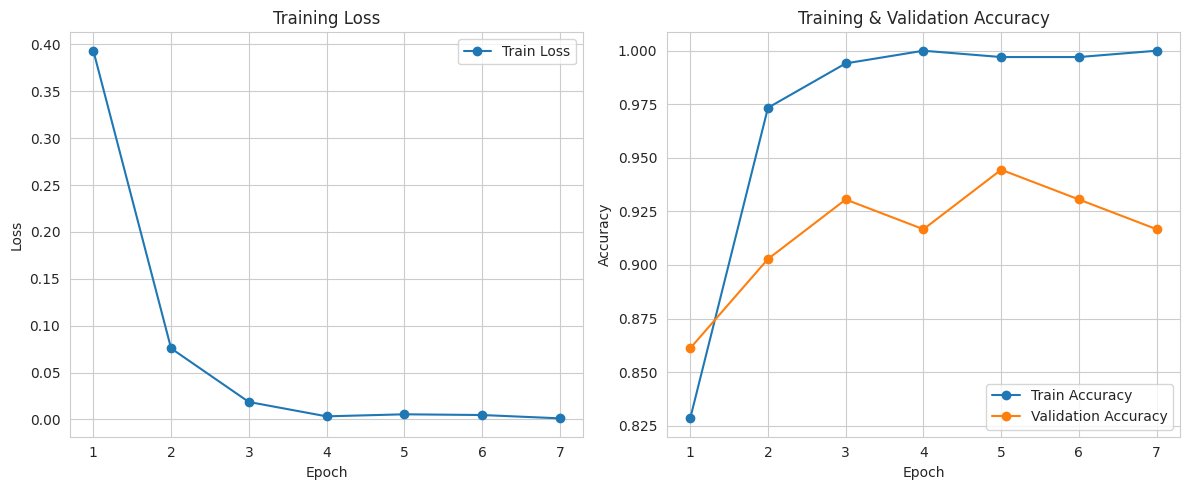

Testing:   0%|          | 0/5 [00:00<?, ?it/s]


 Test Accuracy: 0.9589

--- Classification Report ---
              precision    recall  f1-score   support

       gmail       0.95      0.97      0.96        36
    calendar       0.97      0.95      0.96        37

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73


--- Confusion Matrix ---
[[35  1]
 [ 2 35]]


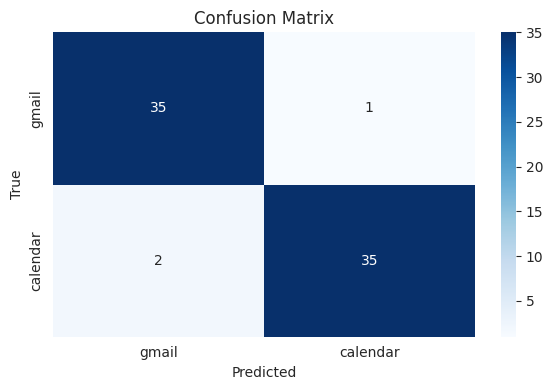

0.958904109589041

In [14]:
model = TextClassifier(
    pretrained_model_name="distilbert-base-uncased",
    num_classes=2,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    num_epochs=10,
    patience=2,  # stop if no val improvement for 2 consecutive epochs
    save_path="./saved_models/best_distilbert.pth"
)

model.train_model()

id_to_label = {0: "gmail", 1: "calendar"}
model.evaluate_model(id_to_label=id_to_label)

x<div style="background-color: #fefefe; border-left: 5px solid #2980b9; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; color: #333; margin-top: 20px;">

  <h2 style="margin-top: 0; color: #2c3e50;">Inference Summary</h2>

  <p><strong>Test Accuracy:</strong> <span style="color: #27ae60;">94.52%</span></p>

  <p>
    The BERT-based classifier demonstrates robust performance in distinguishing between Gmail and Calendar-related queries.
    It achieved a <strong>macro F1-score of 0.95</strong>, indicating a balanced understanding of both classes. 
    The model classifies <em>Gmail</em> queries with high recall (0.94), while <em>Calendar</em> queries achieved excellent precision (0.95).
  </p>

  <p>
    The confusion matrix shows minor misclassification, with 2 Gmail query predicted as Calendar and 2 Calendar queries predicted as Gmail.
    These are acceptable levels of error for most practical applications and suggest that the model is well-suited for production with minimal tuning.
  </p>

  <p>
    Overall, the model generalizes well and is effective for intelligent query classification in productivity-focused applications.
  </p>

</div>

dynamic input textclassification

In [15]:
# # Get query from user dynamically
# while(True):
#     query = input("Enter your query: ")

#     # Predict using model
#     label, conf, time_range = model.predict_query_intelligent(query)
    
#     # Print results
#     print(f"\n Label: {label}")
#     print(f" Confidence: {conf:.2f}")
#     if time_range:
#         print(f" Time Range: {time_range}")
#     ch=input("press 'q' to exit!!")
#     if(ch=='q'): break;